# Measuring Efficiency of Algorithms

Evaluating *how much time* algorithms take to complete their tasks, giving preference to the one that runs faster.

**`time.time()`:** returns the number of seconds elapsed since 0:00 on January 1st, 1970.

**`time.process_time()`:** clock that measures how long the process has kept the computer busy since it started running.

- To measure the time that some code takes, record `time.process_time()` in a variable, run the code, then run `time.process_time()` again, and compute the difference.  
- Plot the measurements and attempt to fit a curve for analysis (examples fit either a polynomial or exponential curve).

In [2]:
# =============================================================================
# IMPORT LIBRARIES
# =============================================================================
import time
import numpy as np
import matplotlib.pyplot as plt
from typing import *

## Defined Functions to Measure Callables and Generate "Fit" Visualizations

In [5]:
def measure_time_list(function: callable, ns: list[int]) -> list[float]:
    """Run function on lists of each length in ns,
    and measure how long each call takes."""

    times = []
    
    for n in ns:
        testlist = list(range(n)) # make a (sorted) list of length n.
        starttime = time.process_time()
        function(testlist)
        endtime = time.process_time()
        times.append(endtime - starttime)
            
    return times

In [3]:
def estimate_fit(times: list[float], ns: list[int], deg: int=0) -> list[float]:
    """Here ns is a list of problem sized, and times are the corresponding running times.
    Draw a plot of the running time (in seconds), and fit a curve:
    * if deg==0, fit an exponential curve;
    * otherwise, fit a polynomial of that degree.
    
    Requires: times and ns have the same length.
    """

    ns = np.array(ns)
    times = np.array(times)

    plt.plot(ns, times, label="Running Time")
    
    if deg == 0:
        ## Linear best-fit assuming it's an exponential function.
        pfit = np.polynomial.Polynomial.fit(ns, np.log(times), 1, w = np.sqrt(ns)).convert().coef
        pfit = np.exp(pfit)
        print("Running time is something like {:.3} * {:.3}**n seconds".format(pfit[0], pfit[1]))
        plt.plot(ns, pfit[0] * pfit[1] ** ns, 'o',
                 label="Fit (Exponential)".format(deg))
    else:
        pfit = np.polynomial.Polynomial.fit(ns, times, deg)
        coefs = pfit.convert().coef
        print("Running time is something like {} seconds".format(' + '.join(['{:.3} * x**{}'.format(coefs[i], i) 
                                                                       for i in range(deg, 1, -1)]
                                                                    + ['{:.3} * x'.format(coefs[1]),
                                                                     '{:.3}'.format(coefs[0])])))
        plt.plot(ns, pfit(ns), label="Fit (degree={})".format(deg))
        
    plt.xlabel("Length of list")
    plt.ylabel("Time (s)")
    plt.legend()

    plt.show()
    
    return pfit

## Comparing 3 Functions Calculating the Largest Value in a List of Numbers

To demonstrate the cost of algorithms, consider the following description of an algorithm to find the largest item in a list:

1. If the list has only 1 item in it, return that item.
1. If the first item in the list is larger than the largest item after the first, return the first item.
1. Otherwise, return the largest item after the first item.

- Define a function that naively implements this description.
- Measure its running time for various lists and plot results.

The plot looks exponential, so fit an exponential to it:

Running time is something like 1.18e-06 * 1.86**n seconds


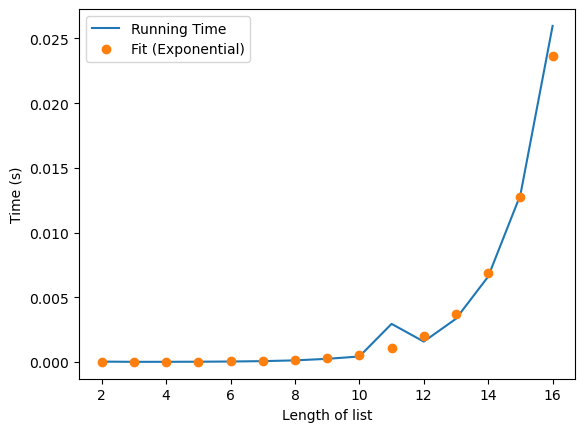

In [6]:
def largest(numbers: list[int]) -> int:
    """Return the largest value in numbers."""

    ## If the list has only 1 item, return it.
    if len(numbers) == 1:
        return numbers[0]

    ## If the first item is larger than the largest after the first, 
    ##     return the first item.
    elif numbers[0] > largest(numbers[1:]):
        return numbers[0]

    ## Otherwise, return the largest item after the first item.
    else:
        return largest(numbers[1:])        


## Test function and find a best-fit.
sizes = range(2,17)
estimate_fit(measure_time_list(largest, sizes), sizes, deg=0);

Running time is something like 7.93e-09 * x**2 + -4.74e-06 * x + 0.000909 seconds


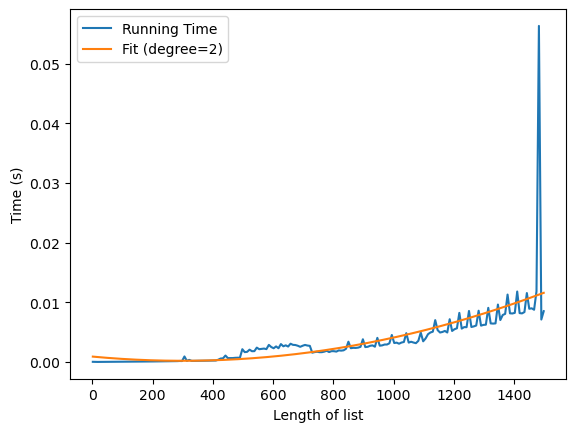

In [7]:
def largest2(numbers: list[int]) -> int:
    """Return the largest value in numbers."""
    
    ## If the list has only 1 item, return it.
    if len(numbers) == 1:
        return numbers[0]
    
    rest_largest = largest2(numbers[1:])

    ## If the first item is larger than the largest after the first, 
    ##     return the first item.
    if numbers[0] > rest_largest:
        return numbers[0]

    ## Otherwise, return the largest item after the first item.
    else:
        return rest_largest
    
sizes = range(2,1500,8)
estimate_fit(measure_time_list(largest2, sizes), sizes, deg=2);

Running time is something like 2.01e-08 * x + 0.000191 seconds


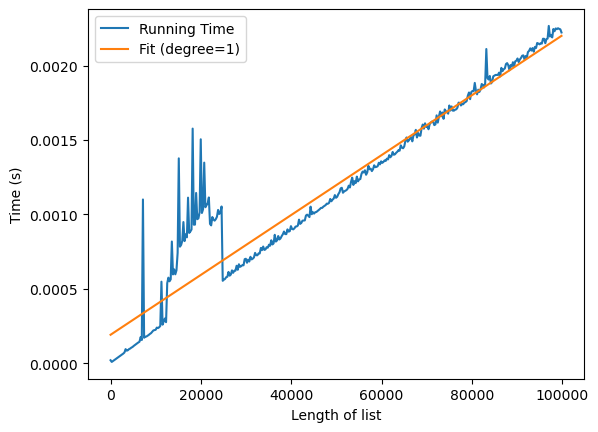

In [8]:
def largest3(numbers: list[int]) -> int:
    """Return the largest value in numbers."""
    
    largest = numbers[0]
    
    for item in numbers:
        if item > largest:
            largest = item
            
    return largest

sizes = range(2,100000,256)
estimate_fit(measure_time_list(largest3, sizes), sizes, deg=1);